In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Paso 1: Carga del Dataset

In [4]:
salud = pd.read_csv('mental_health.csv')
salud.head()

,Age,Gender,Education_Level,Employment_Status,Sleep_Hours,Physical_Activity_Hrs,Social_Support_Score,Anxiety_Score,Depression_Score,Stress_Level,...,Chronic_Illnesses,Medication_Use,Therapy,Meditation,Substance_Use,Financial_Stress,Work_Stress,Self_Esteem_Score,Life_Satisfaction_Score,Loneliness_Score
0,56,Male,Bachelor's,Unemployed,6.0,0.4,3,4,2,9,...,0,NaN,0,1,NaN,4,3,7,5,1
1,69,Female,Bachelor's,Retired,8.8,2.8,6,18,7,6,...,0,NaN,1,0,NaN,1,4,7,4,6
2,46,Female,Master's,Employed,5.3,1.6,5,5,13,8,...,0,NaN,0,1,NaN,8,7,8,1,1
3,32,Female,High School,Unemployed,8.8,0.5,4,6,3,4,...,1,NaN,0,0,NaN,7,4,8,4,4
4,60,Female,Bachelor's,Retired,7.2,0.7,2,7,15,3,...,0,NaN,1,1,Frequent,8,9,5,7,7


In [5]:
print(salud.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1200 non-null   int64  
 1   Gender                         1200 non-null   object 
 2   Education_Level                1200 non-null   object 
 3   Employment_Status              1200 non-null   object 
 4   Sleep_Hours                    1200 non-null   float64
 5   Physical_Activity_Hrs          1200 non-null   float64
 6   Social_Support_Score           1200 non-null   int64  
 7   Anxiety_Score                  1200 non-null   int64  
 8   Depression_Score               1200 non-null   int64  
 9   Stress_Level                   1200 non-null   int64  
 10  Family_History_Mental_Illness  1200 non-null   int64  
 11  Chronic_Illnesses              1200 non-null   int64  
 12  Medication_Use                 453 non-null    o

* ¿Cuántos registros y columnas tiene el dataset?
    1200 registros y 21 columnas
* ¿Qué tipo de datos predominan?
    Predominan los datos de tipo entero

Paso 2: Exploración Inicial

In [6]:
#Existen datos que deben ser categoricos y eran de tipo object
categorical_cols = ['Gender', 'Education_Level', 'Employment_Status', 'Medication_Use', 'Substance_Use']
for col in categorical_cols:
    salud[col] = salud[col].astype('category')

salud.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Age                            1200 non-null   int64   
 1   Gender                         1200 non-null   category
 2   Education_Level                1200 non-null   category
 3   Employment_Status              1200 non-null   category
 4   Sleep_Hours                    1200 non-null   float64 
 5   Physical_Activity_Hrs          1200 non-null   float64 
 6   Social_Support_Score           1200 non-null   int64   
 7   Anxiety_Score                  1200 non-null   int64   
 8   Depression_Score               1200 non-null   int64   
 9   Stress_Level                   1200 non-null   int64   
 10  Family_History_Mental_Illness  1200 non-null   int64   
 11  Chronic_Illnesses              1200 non-null   int64   
 12  Medication_Use                 453

¿Hay valores que parecen inconsistentes o fuera de rango?

In [7]:
print(salud[['Sleep_Hours', 'Physical_Activity_Hrs']].describe())

print(salud[salud['Sleep_Hours'] < 4])  # Ver casos con poco sueño
print(salud[salud['Sleep_Hours'] > 10]) # Ver casos con demasiado sueño



       Sleep_Hours  Physical_Activity_Hrs
count   1200.00000            1200.000000
mean       6.46900               2.005750
std        1.52955               2.037818
min        2.00000               0.000000
25%        5.40000               0.600000
50%        6.40000               1.400000
75%        7.50000               2.700000
max       12.40000              15.100000
      Age      Gender Education_Level Employment_Status  Sleep_Hours  \
7      56  Non-Binary        Master's        Unemployed          3.3   
36     33      Female           Other           Retired          2.7   
89     65      Female      Bachelor's        Unemployed          3.8   
97     33        Male           Other           Retired          3.8   
111    42        Male           Other           Student          3.6   
...   ...         ...             ...               ...          ...   
1099   32        Male     High School           Retired          3.5   
1107   34        Male     High School         

In [8]:
#Horas de actividad fisica considerando como caso extremo 10 horas
print(salud[salud['Physical_Activity_Hrs'] > 10])  # Casos extremos


      Age  Gender Education_Level Employment_Status  Sleep_Hours  \
365    50    Male           Other        Unemployed          8.9   
393    38  Female     High School           Student          7.8   
603    66  Female           Other           Retired          7.2   
830    28  Female             PhD           Student          6.4   
872    19  Female     High School          Employed          9.7   
925    18    Male        Master's           Student          7.6   
1165   48    Male      Bachelor's        Unemployed          4.3   

      Physical_Activity_Hrs  Social_Support_Score  Anxiety_Score  \
365                    13.4                     6              2   
393                    10.8                     9             12   
603                    12.1                     3             11   
830                    14.7                     3             12   
872                    11.2                     1             13   
925                    10.9                    

In [9]:
print(salud[salud['Age'] < 0]) # Busca edades negativas
for col in salud.select_dtypes(include='object'):
    print(f"Columna: {col}")
    print(salud[col].unique())
    print("------------")





Empty DataFrame
Columns: [Age, Gender, Education_Level, Employment_Status, Sleep_Hours, Physical_Activity_Hrs, Social_Support_Score, Anxiety_Score, Depression_Score, Stress_Level, Family_History_Mental_Illness, Chronic_Illnesses, Medication_Use, Therapy, Meditation, Substance_Use, Financial_Stress, Work_Stress, Self_Esteem_Score, Life_Satisfaction_Score, Loneliness_Score]
Index: []

[0 rows x 21 columns]


In [10]:
print(salud[['Medication_Use', 'Substance_Use']].isnull().sum())


Medication_Use    747
Substance_Use     834
dtype: int64


Tomando en cuenta la salud mental al definir como criterio entre 4 y 10 horas de sueño hay 7 personas fuera de ese rango.
Considerando más de 10 horas de actividad fisica como caso extremo eisten 7 personas que realizan más de 10 horas
No existen valores unicos en las columnas

Paso 3: Limpieza de Datos

In [11]:
# Calcular el porcentaje de valores nulos por columna
porcentaje_nulos = salud.isnull().sum() / len(salud) * 100
print(porcentaje_nulos)

# Calcular el porcentaje total de valores nulos en el dataset
porcentaje_total_nulos = salud.isnull().sum().sum() / salud.size * 100


print("\nPorcentaje total de valores nulos en el dataset:", porcentaje_total_nulos, "%")

Age                               0.00
Gender                            0.00
Education_Level                   0.00
Employment_Status                 0.00
Sleep_Hours                       0.00
Physical_Activity_Hrs             0.00
Social_Support_Score              0.00
Anxiety_Score                     0.00
Depression_Score                  0.00
Stress_Level                      0.00
Family_History_Mental_Illness     0.00
Chronic_Illnesses                 0.00
Medication_Use                   62.25
Therapy                           0.00
Meditation                        0.00
Substance_Use                    69.50
Financial_Stress                  0.00
Work_Stress                       0.00
Self_Esteem_Score                 0.00
Life_Satisfaction_Score           0.00
Loneliness_Score                  0.00
dtype: float64

Porcentaje total de valores nulos en el dataset: 6.273809523809523 %


In [12]:
# Agregar "Desconocido" como una categoría válida
salud["Medication_Use"] = salud["Medication_Use"].cat.add_categories("Desconocido")
salud["Substance_Use"] = salud["Substance_Use"].cat.add_categories("Desconocido")

# Rellenar valores nulos con "Desconocido"
salud["Medication_Use"].fillna("Desconocido", inplace=True)
salud["Substance_Use"].fillna("Desconocido", inplace=True)


C:\Users\-HP-\AppData\Local\Temp\ipykernel_9924\776016056.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  salud["Medication_Use"].fillna("Desconocido", inplace=True)
C:\Users\-HP-\AppData\Local\Temp\ipykernel_9924\776016056.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [13]:
#Como podemos ver rellenamos los valores nulos con "desconocido"
print(salud["Medication_Use"])
print(salud["Substance_Use"])

0       Desconocido
1       Desconocido
2       Desconocido
3       Desconocido
4       Desconocido
           ...     
1195     Occasional
1196    Desconocido
1197    Desconocido
1198    Desconocido
1199    Desconocido
Name: Medication_Use, Length: 1200, dtype: category
Categories (3, object): ['Occasional', 'Regular', 'Desconocido']
0       Desconocido
1       Desconocido
2       Desconocido
3       Desconocido
4          Frequent
           ...     
1195    Desconocido
1196    Desconocido
1197    Desconocido
1198    Desconocido
1199       Frequent
Name: Substance_Use, Length: 1200, dtype: category
Categories (3, object): ['Frequent', 'Occasional', 'Desconocido']


In [14]:
pivot_table = pd.pivot_table(
    salud,
    values="Age",
    index="Medication_Use",
    columns="Substance_Use",
    aggfunc="count",
    fill_value=0,
    margins=True
)

print(pivot_table)


Substance_Use   Frequent  Occasional  Desconocido   All
Medication_Use                                         
Occasional            20          42          153   215
Regular               25          53          160   238
Desconocido           79         147          521   747
All                  124         242          834  1200


C:\Users\-HP-\AppData\Local\Temp\ipykernel_9924\1899037431.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(


¿Qué porcentaje del dataset contiene valores nulos?
6.27 %
¿Qué estrategia decidiste aplicar para tratar los valores nulos y por qué?
Para tratar los valores nulos en las columnas Medication_Use y Substance_Use, se decidió utilizar la estrategia de imputación con una categoría adicional, reemplazando los valores faltantes por "Desconocido".

Paso 4: Análisis Estadístico

In [15]:
# Calcular estadísticas descriptivas
estadisticas = salud[["Anxiety_Score", "Depression_Score", "Stress_Level"]].agg(["mean", "median", "std"])

# Mostrar resultados
print(estadisticas)


        Anxiety_Score  Depression_Score  Stress_Level
mean        10.470000         10.674167      5.000833
median      10.500000         11.000000      5.000000
std          5.911138          5.632889      2.538281


¿Cuál de los tres puntajes tiene mayor variabilidad?
Anxiety_Score
¿Qué observas sobre la diferencia entre media y mediana en cada caso? ¿Qué te dice esto sobre la distribución?
Anxiety_Score y Depression_Score tienen ligeras diferencias que podrían señalar una ligera asimetría hacia la izquierda (cuando la media es un poco menor que la mediana), mientras que Stress_Level parece tener una distribución simétrica.

Paso 5: Filtrado de Datos

In [ ]:
# Definir el umbral de niveles altos de ansiedad
umbral_ansiedad = salud["Anxiety_Score"].mean()

# Contar cuántas personas tienen niveles altos de ansiedad
#Considerando niveles altos como mayores al promedio
altos_niveles_ansiedad = salud[salud["Anxiety_Score"] > umbral_ansiedad].shape[0]

# Calcular el porcentaje
porcentaje_altos_niveles_ansiedad = (altos_niveles_ansiedad / salud.shape[0]) * 100

# Mostrar el resultado
print(f"El porcentaje de personas con niveles altos de ansiedad es: {porcentaje_altos_niveles_ansiedad:.2f}%")


El porcentaje de personas con niveles altos de ansiedad es: 50.00%


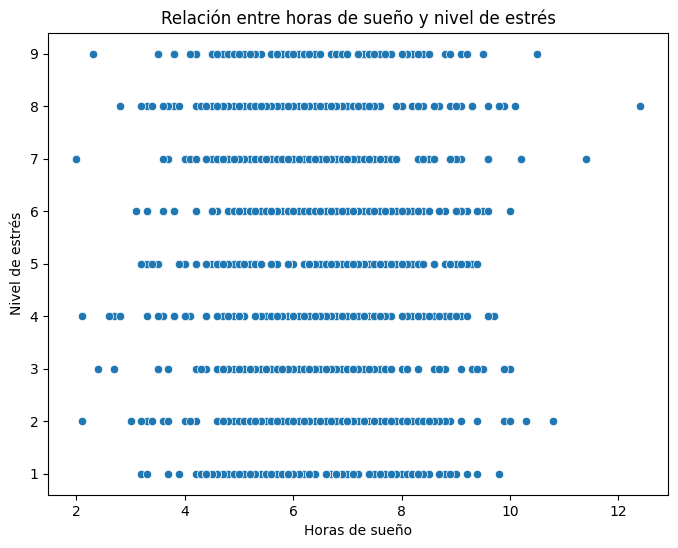

In [ ]:


# Crear gráfico de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(x=salud["Sleep_Hours"], y=salud["Stress_Level"])
plt.title("Relación entre horas de sueño y nivel de estrés")
plt.xlabel("Horas de sueño")
plt.ylabel("Nivel de estrés")
plt.show()


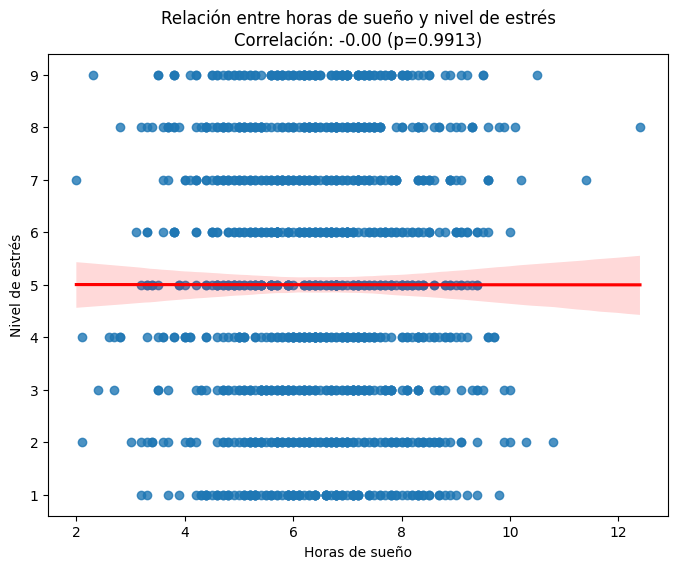

Coeficiente de correlación de Pearson: -0.00
Valor p: 0.9913


In [17]:

import scipy.stats as stats

# Calcular la correlación de Pearson
correlation, p_value = stats.pearsonr(salud["Sleep_Hours"], salud["Stress_Level"])

# Crear gráfico de dispersión con línea de regresión
plt.figure(figsize=(8, 6))
sns.regplot(x=salud["Sleep_Hours"], y=salud["Stress_Level"], scatter=True, line_kws={"color": "red"})
plt.title(f"Relación entre horas de sueño y nivel de estrés\nCorrelación: {correlation:.2f} (p={p_value:.4f})")
plt.xlabel("Horas de sueño")
plt.ylabel("Nivel de estrés")
plt.show()

# Imprimir la correlación numérica
print(f"Coeficiente de correlación de Pearson: {correlation:.2f}")
print(f"Valor p: {p_value:.4f}")


¿Qué porcentaje del total presenta niveles altos de ansiedad?
50%
¿Existe una relación visible entre las horas de sueño y el nivel de estrés?
Con base en estos resultados, podemos decir que las horas de sueño no influyen significativamente en el nivel de estrés en esta muestra de datos. Sin embargo, podría haber otros factores (como calidad del sueño, hábitos de vida o trabajo) que sí tengan impacto en el estrés y que no están considerados aquí.


Paso 6: Ordenamiento

In [23]:
# Ordenar por mayor satisfacción de vida y menor puntaje de soledad
top_satisfechos = salud.sort_values(by=["Life_Satisfaction_Score", "Loneliness_Score"], ascending=[False, True])

# Seleccionar las 10 personas con mayor satisfacción y menor soledad
top_10 = top_satisfechos.head(10)

# Mostrar las características comunes en estas 10 personas
print(top_10.describe(include="all"))  # Resumen estadístico y categórico

# Guardar el subconjunto en un archivo CSV
top_10.to_csv("top_satisfechos_menor_soledad.csv", index=False)

print("Archivo 'top_satisfechos_menor_soledad.csv' guardado con éxito.")

              Age  Gender Education_Level Employment_Status  Sleep_Hours  \
count   10.000000      10              10                10    10.000000   
unique        NaN       3               5                 4          NaN   
top           NaN  Female             PhD          Employed          NaN   
freq          NaN       6               3                 5          NaN   
mean    42.000000     NaN             NaN               NaN     6.140000   
std     11.155467     NaN             NaN               NaN     1.346766   
min     25.000000     NaN             NaN               NaN     3.600000   
25%     33.500000     NaN             NaN               NaN     5.425000   
50%     43.500000     NaN             NaN               NaN     6.250000   
75%     47.750000     NaN             NaN               NaN     7.125000   
max     61.000000     NaN             NaN               NaN     8.000000   

        Physical_Activity_Hrs  Social_Support_Score  Anxiety_Score  \
count            

¿Qué características comunes encuentras en estas 10 personas?
    Características comunes encontradas:

    Género: Mayoría son mujeres (6 de 10).

    Educación: Nivel educativo alto (PhD es el más común).

    Empleo: La mayoría está empleada (5 de 10).

    Edad: Promedio de 42 años (rango de 25 a 61).

    Horas de sueño: 6.14 en promedio (mínimo 3.6, máximo 8).

    Ejercicio: Hacen en promedio 1.76 horas de actividad física al día (algunos hasta 5.1 h).

    Apoyo social: Promedio de 4.7 en Social Support Score (rango de 1 a 9).

    Ansiedad: Promedio de 13.1 en Anxiety Score (rango de 4 a 20).
    
¿Qué hipótesis podrías plantear sobre el vínculo entre satisfacción y soledad?
    Existe una relación entre mayor satisfcción de vida a menor grado de soledad

Paso 7: Guardado de Resultados

In [25]:


# Calcular la mediana del nivel de estrés
mediana_estres = salud["Stress_Level"].median()

# Filtrar personas que reciben terapia (Therapy == 1) y tienen nivel de estrés menor a la mediana
subset_terapia_estres = salud[(salud["Therapy"] == 1) & (salud["Stress_Level"] < mediana_estres)]

# Guardar el subconjunto en un nuevo archivo CSV
subset_terapia_estres.to_csv("terapia_bajo_estres.csv", index=False)

# Mostrar el número de personas que cumplen ambas condiciones
print(f"Número de personas que reciben terapia y tienen bajo estrés: {len(subset_terapia_estres)}")


Número de personas que reciben terapia y tienen bajo estrés: 108


¿Cuántas personas cumplen con ambas condiciones?
108
¿Qué conclusiones puedes hacer sobre la relación entre terapia y nivel de estrés en este conjunto?
A menor cantidad de terapia existen mayores personas con  bajo estres

Paso 8: Visualización Opcional

C:\Users\-HP-\AppData\Local\Temp\ipykernel_9924\2777051559.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_autoestima_por_genero = salud.groupby('Gender')['Self_Esteem_Score'].mean()


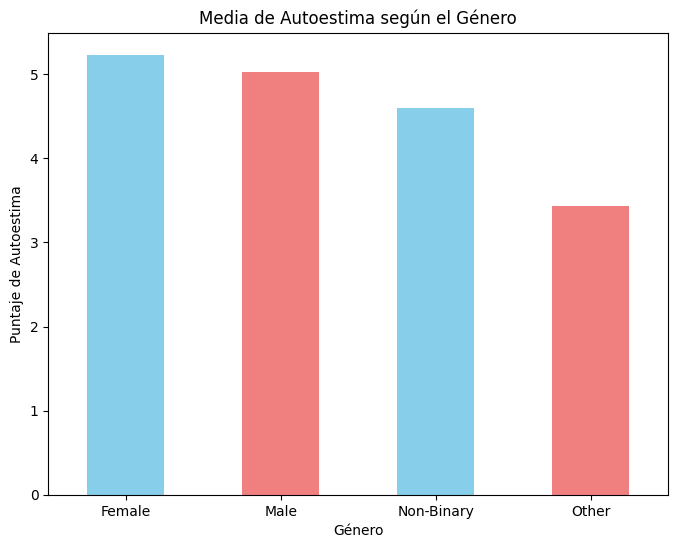

In [26]:


# Calcular la media de autoestima por género
media_autoestima_por_genero = salud.groupby('Gender')['Self_Esteem_Score'].mean()

# Crear gráfico de barras
plt.figure(figsize=(8, 6))
media_autoestima_por_genero.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Media de Autoestima según el Género')
plt.xlabel('Género')
plt.ylabel('Puntaje de Autoestima')
plt.xticks(rotation=0)  # Para que las etiquetas del eje X no se roten
plt.show()


¿Hay diferencias notables entre los géneros en cuanto a autoestima?
Las mujeres tienen mayor autoestima, seguido de los hombres, los generos con menor autoestima son No binerios y otros

¿Qué factores del dataset podrían explicar estas diferencias?
Si el soporte social es mayor en un género, es posible que las personas de ese género tengan una autoestima más alta, lo cual podría reflejarse en la variable Social_Support_Score.